In [177]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import colors
from matplotlib import ticker
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import rcParams
from matplotlib import patches
import scipy.io
import astropy.constants as const
rcParams['text.usetex'] = True
rcParams['font.family'] = 'serif'
import fitting_template
import importlib
#from IPython.display import display, Math
from astropy.modeling import models, fitting, Fittable1DModel, Parameter
from scipy.optimize import curve_fit
importlib.reload(fitting_template)
import fitting_template
from fitting_template import FeXII_fit
from fitting_template import myGaussian1D
from fitting_template import myVoigt1D
import pandas as pd
from scipy.integrate import simps
import h5py
from scipy.optimize import curve_fit
plt.style.use('science')
rcParams['axes.linewidth'] = 1.2
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = 'cm'
rcParams['figure.dpi']= 72
import sunpy
import sunpy.map
xrtmap = plt.get_cmap("hinodexrt")

In [194]:
data_set = scipy.io.readsav("../save/new_lvl1_offset_limb_1025_southpole_l1_20071025_15193.sav",verbose=True)
data_set_repeat = scipy.io.readsav("../save/new_lvl1_offset_limb_1025_southpole_l1_20071025_16243.sav",verbose=False)
data_set_cor = scipy.io.readsav("../save/new_lvl1_offset_limb_1025_southpole_tilt_cor_l1_20071025_15193.sav",verbose=False)
data_set_cor_repeat = scipy.io.readsav("../save/new_lvl1_offset_limb_1025_southpole_tilt_cor_l1_20071025_16243.sav",verbose=False)

--------------------------------------------------
Date: Thu Mar 11 09:15:36 2021
User: yjzhu
Host: Yingjies-MacBook-Pro.local
--------------------------------------------------
Format: 11
Architecture: x86_64
Operating System: darwin
IDL Version: 8.2
--------------------------------------------------
Successfully read 8 records of which:
 - 1 are of type TIMESTAMP
 - 1 are of type VERSION
 - 5 are of type VARIABLE
--------------------------------------------------
Available variables:
 - wvl [<class 'numpy.ndarray'>]
 - new_data_offset [<class 'numpy.ndarray'>]
 - new_err_offset [<class 'numpy.ndarray'>]
 - window_start_index [<class 'numpy.ndarray'>]
 - window_end_index [<class 'numpy.ndarray'>]
--------------------------------------------------


In [232]:
ch_example_ds = scipy.io.readsav("../save/eis_coronal_hole_example.save",verbose=True)

--------------------------------------------------
Date: Tue Jul 30 10:56:58 2019
User: elandi
Host: srbwks2017-0037.engin.umich.edu
--------------------------------------------------
Format: 12
Architecture: x86_64
Operating System: darwin
IDL Version: 8.5
--------------------------------------------------
Successfully read 7 records of which:
 - 1 are of type TIMESTAMP
 - 1 are of type VERSION
 - 4 are of type VARIABLE
--------------------------------------------------
Available variables:
 - wvl [<class 'numpy.ndarray'>]
 - eis_spectrum [<class 'numpy.ndarray'>]
 - header [<class 'numpy.recarray'>]
 - texp [<class 'numpy.float32'>]
--------------------------------------------------


In [187]:
window_start_index = data_set["window_start_index"]
window_end_index = data_set["window_end_index"]
wvl = data_set_cor["wvl"]
wvl_repeat = data_set_cor_repeat["wvl"]

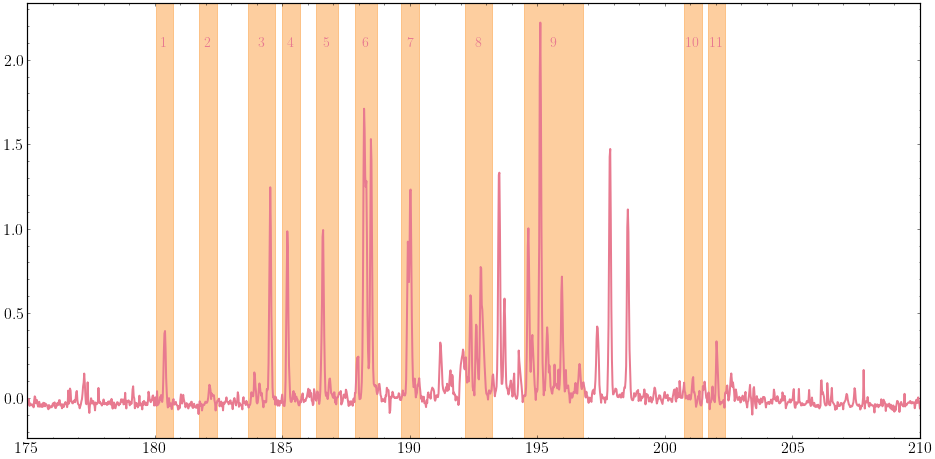

In [239]:
fig, ax = plt.subplots(figsize=(16,8))
plt.plot(ch_example_ds["wvl"],ch_example_ds["eis_spectrum"],lw=2,color="#E87A90")
ax.set_xlim(175,210)
for ii in range(11):
    ax.axvspan(wvl[window_start_index[ii]],wvl[window_end_index[ii]],alpha=0.5,color="#FC9F40")
    ax.text((wvl[window_start_index[ii]] + wvl[window_end_index[ii]])/2,2.1,str(ii+1),
            ha = 'center',va = 'center', color = '#E87A90',fontsize = 14,linespacing=1.5,weight='bold')
ax.tick_params(labelsize=16)

In [4]:
#A function to average every N rows...
def avg_new(my_array, N=2):
    return ma.mean(my_array.reshape(-1,N,my_array.shape[-1]),axis=1)

def avg_err(my_array, N=2):
    my_reshape_sq = np.square(my_array.reshape(-1,N,my_array.shape[-1]))
    mask_reshape_sq = np.logical_not(my_reshape_sq.mask) * 1
    return np.sqrt(ma.sum(my_reshape_sq, axis = 1))/ma.sum(mask_reshape_sq, axis = 1)

He II 256 index 12

Fe XII 195 index 8

Fe XII 192 index 7 

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


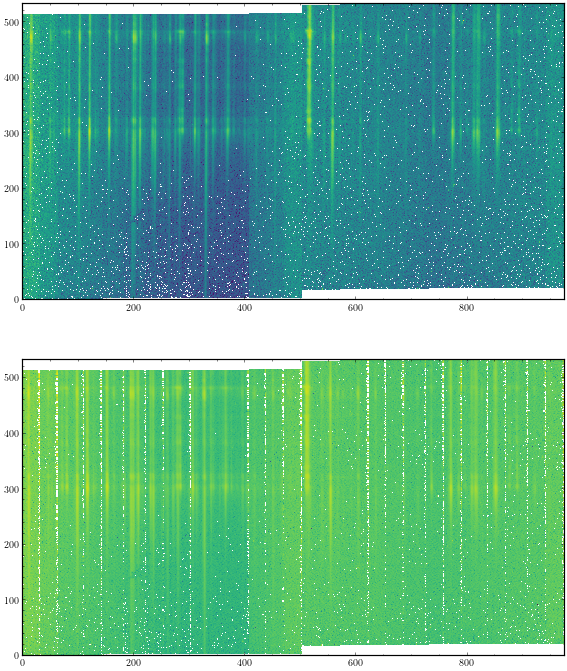

In [5]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(12,12))
ax1.imshow(np.log10(data_set["new_data_offset"][37,:,:]),origin="lower")
ax2.imshow(np.log10(data_set_cor["new_data_offset"][37,:,:]),origin="lower")

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """


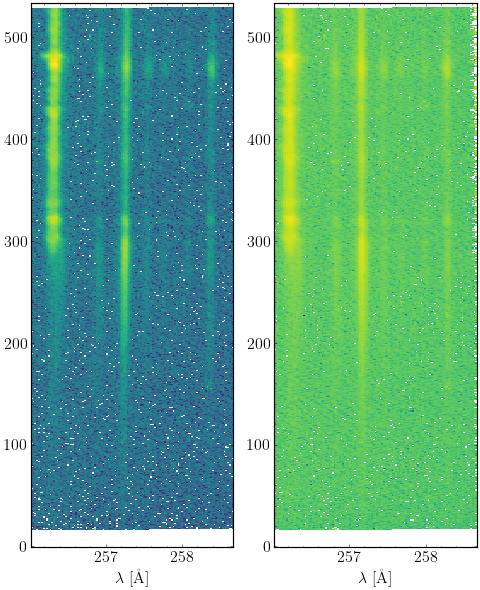

In [6]:
#He II 256 window 
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(8,10))
ax1.imshow(np.log10(data_set["new_data_offset"][37,:,window_start_index[12]:window_end_index[12]]),origin="lower",aspect="auto",
          extent=(wvl[window_start_index[12]],wvl[window_end_index[12]],-0.5,533.5))
ax2.imshow(np.log10(data_set_cor["new_data_offset"][37,:,window_start_index[12]:window_end_index[12]]),origin="lower",aspect="auto",
          extent=(wvl[window_start_index[12]],wvl[window_end_index[12]],-0.5,533.5))
for ax_ in (ax1,ax2):
    ax_.tick_params(labelsize=16)
    ax_.set_xlabel(r"$\lambda\ [\mathrm{\AA}]$",fontsize=16)

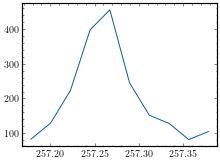

In [7]:
plt.plot(wvl[window_start_index[12]+52:window_end_index[12]-57],
         data_set["new_data_offset"][37,-10,window_start_index[12]+52:window_end_index[12]-57])

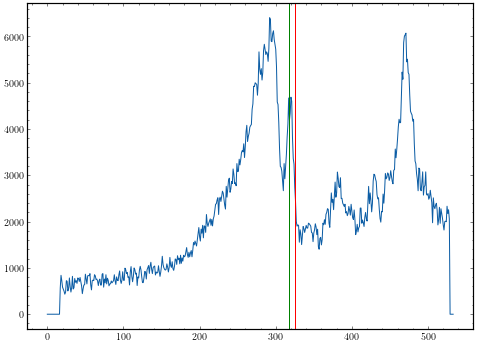

In [8]:
fig,ax=plt.subplots(figsize=(8,6))
plt.plot(np.sum(data_set["new_data_offset"][37,:,window_start_index[12]+52:window_end_index[12]-57],axis=1))
ax.axvline(325,color="red")
ax.axvline(317,color="green")

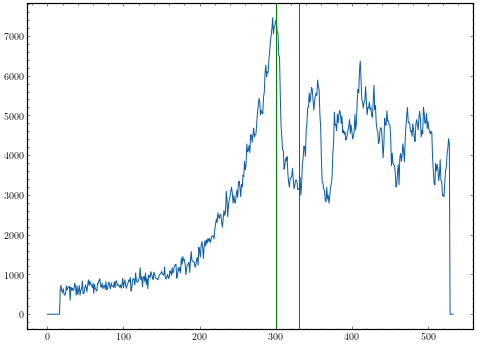

In [9]:
fig,ax=plt.subplots(figsize=(8,6))
plt.plot(np.sum(data_set["new_data_offset"][-5,:,window_start_index[12]+52:window_end_index[12]-57],axis=1))
ax.axvline(330,color="red")
ax.axvline(300,color="green")

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """


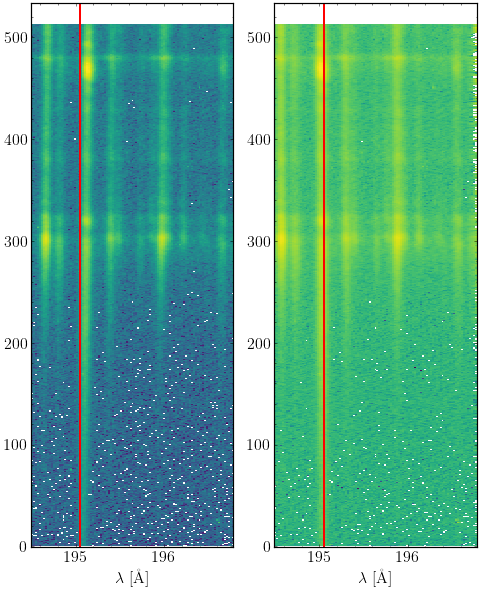

In [10]:
#Fe XII 195
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(8,10))
ax1.imshow(np.log10(data_set["new_data_offset"][37,:,window_start_index[8]:window_end_index[8]]),origin="lower",aspect="auto",
          extent=(wvl[window_start_index[8]],wvl[window_end_index[8]],-0.5,533.5))
ax2.imshow(np.log10(data_set_cor["new_data_offset"][37,:,window_start_index[8]:window_end_index[8]]),origin="lower",aspect="auto",
          extent=(wvl[window_start_index[8]],wvl[window_end_index[8]],-0.5,533.5))
for ax_ in (ax1,ax2):
    ax_.tick_params(labelsize=16)
    ax_.set_xlabel(r"$\lambda\ [\mathrm{\AA}]$",fontsize=16)
    ax_.axvline(195.05,lw=2,color="red")

In [13]:
wvl_195 = wvl[window_start_index[8]+16:window_start_index[8]+33]
test_data_195 = data_set_cor["new_data_offset"][20:30,1:-21,window_start_index[8]+16:window_start_index[8]+33]
test_data_195_err = data_set_cor["new_err_offset"][20:30,1:-21,window_start_index[8]+16:window_start_index[8]+33]

test_data_195_masked = ma.masked_where(test_data_195_err<=0,test_data_195)
test_err_195_masked = ma.masked_where(test_data_195_err<=0,test_data_195_err)

test_data_195_mean = ma.mean(test_data_195_masked,axis=0)
test_err_195_mean = np.sqrt(ma.sum(test_data_195_masked**2,axis=0))/10

In [249]:
data_195_4563 = data_set_cor["new_data_offset"][45:63,1:-21,window_start_index[8]+16:window_start_index[8]+33]
data_195_err_4563 = data_set_cor["new_err_offset"][45:63,1:-21,window_start_index[8]+16:window_start_index[8]+33]

data_195_masked_4563 = ma.masked_where(data_195_err_4563<=0,data_195_4563)
err_195_masked_4563 = ma.masked_where(data_195_err_4563<=0,data_195_err_4563)

data_195_mean_4563 = ma.mean(data_195_masked_4563,axis=0)
err_195_mean_4563 = np.sqrt(ma.sum(err_195_masked_4563**2,axis=0))/18

In [250]:
data_repeat_195_4563 = data_set_cor_repeat["new_data_offset"][45:63,1:-21,window_start_index[8]+16:window_start_index[8]+33]
data_repeat_195_err_4563 = data_set_cor_repeat["new_err_offset"][45:63,1:-21,window_start_index[8]+16:window_start_index[8]+33]

data_repeat_195_masked_4563 = ma.masked_where(data_repeat_195_err_4563<=0,data_repeat_195_4563)
err_repeat_195_masked_4563 = ma.masked_where(data_repeat_195_err_4563<=0,data_repeat_195_err_4563)

data_repeat_195_mean_4563 = ma.mean(data_repeat_195_masked_4563,axis=0)
err_repeat_195_mean_4563 = np.sqrt(ma.sum(err_repeat_195_masked_4563**2,axis=0))/18

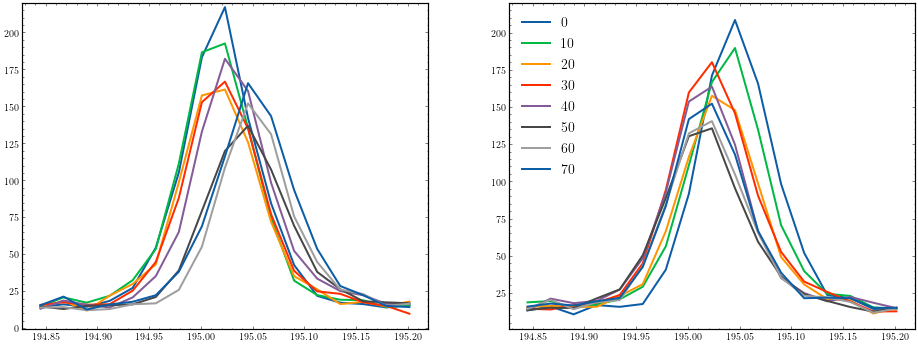

In [211]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,6))
for ii in (0,10,20,30,40,50,60,70):
    ax1.plot(wvl[window_start_index[8]+16:window_start_index[8]+33],
             np.mean(data_set_cor["new_data_offset"][ii,200:210,window_start_index[8]+16:window_start_index[8]+33],axis=0),lw=2,label=str(ii))
    ax2.plot(wvl_repeat[window_start_index[8]+16:window_start_index[8]+33],
             np.mean(data_set_cor_repeat["new_data_offset"][ii,200:210,window_start_index[8]+16:window_start_index[8]+33],axis=0),lw=2,label=str(ii))
plt.legend(loc="upper left",fontsize=14)
for ax_ in (ax1,ax2):
    ax_.set_ylim(top=220)

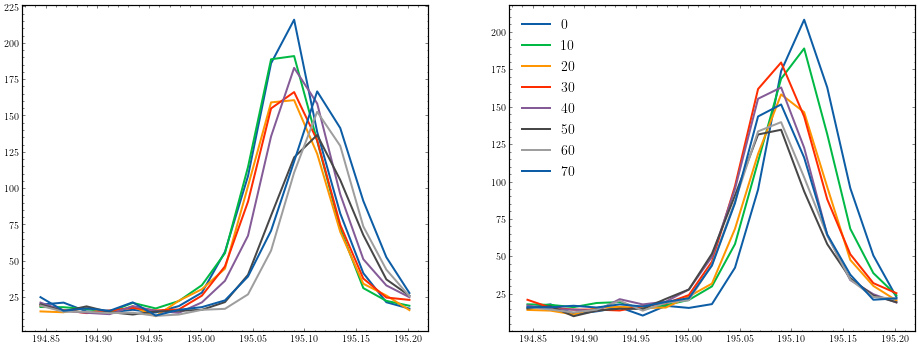

In [204]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,6))
for ii in (0,10,20,30,40,50,60,70):
    ax1.plot(wvl[window_start_index[8]+16:window_start_index[8]+33],
             np.mean(data_set["new_data_offset"][ii,200:210,window_start_index[8]+16:window_start_index[8]+33],axis=0),lw=2,label=str(ii))
    ax2.plot(wvl_repeat[window_start_index[8]+16:window_start_index[8]+33],
             np.mean(data_set_repeat["new_data_offset"][ii,200:210,window_start_index[8]+16:window_start_index[8]+33],axis=0),lw=2,label=str(ii))
plt.legend(loc="upper left",fontsize=14)

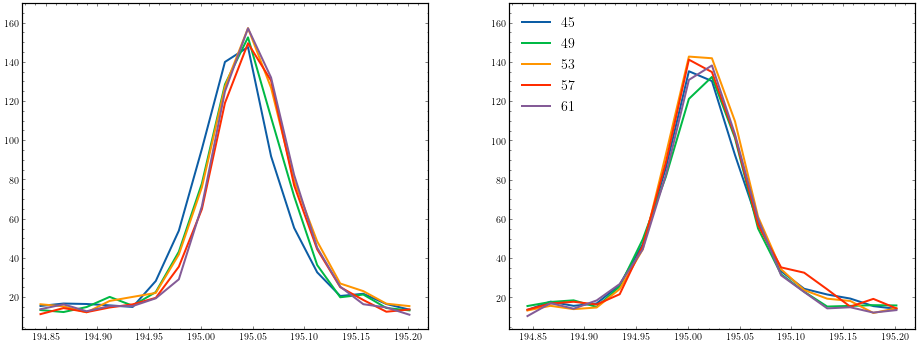

In [207]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,6))
for ii in (45,49,53,57,61):
    ax1.plot(wvl[window_start_index[8]+16:window_start_index[8]+33],
             np.mean(data_set_cor["new_data_offset"][ii,200:210,window_start_index[8]+16:window_start_index[8]+33],axis=0),lw=2,label=str(ii))
    ax2.plot(wvl_repeat[window_start_index[8]+16:window_start_index[8]+33],
             np.mean(data_set_cor_repeat["new_data_offset"][ii,200:210,window_start_index[8]+16:window_start_index[8]+33],axis=0),lw=2,label=str(ii))
plt.legend(loc="upper left",fontsize=14)
for ax_ in (ax1,ax2):
    ax_.set_ylim(top=170)

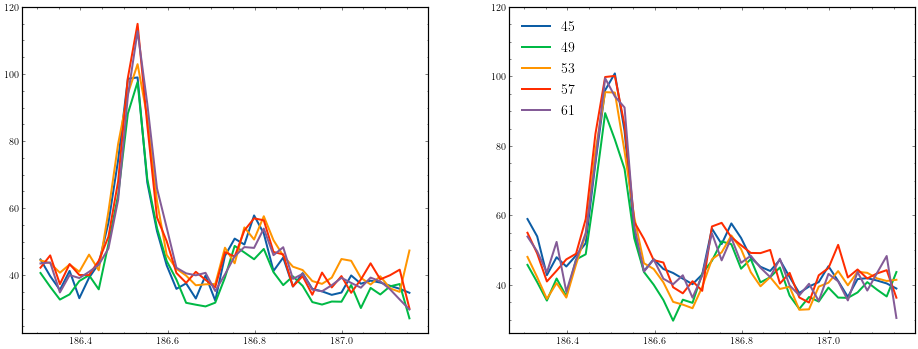

In [281]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,6))
for ii in (45,49,53,57,61):
    ax1.plot(wvl[window_start_index[4]:window_end_index[4]],
             np.mean(data_set_cor["new_data_offset"][ii,200:232,window_start_index[4]:window_end_index[4]],axis=0),lw=2,label=str(ii))
    ax2.plot(wvl[window_start_index[4]:window_end_index[4]],
             np.mean(data_set_cor_repeat["new_data_offset"][ii,200:232,window_start_index[4]:window_end_index[4]],axis=0),lw=2,label=str(ii))
plt.legend(loc="upper left",fontsize=14)
for ax_ in (ax1,ax2):
    ax_.set_ylim(top=120)

<myGaussian1D(intensity=1.69221895, mean=195.01070204, fwhm=0.07866109, bg=0.72335063, stray_int=0., stray_fwhm=1., stray_wvl=0.)>

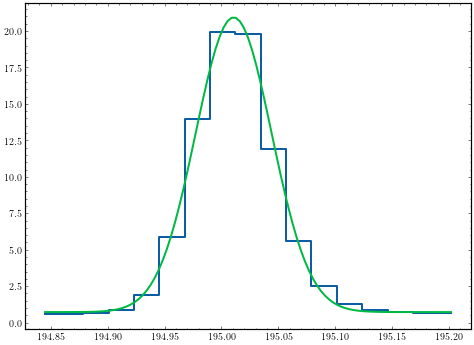

In [251]:
test_stray_195 = ma.mean(test_data_195_mean[340:,:],axis=0)*0.02

g_init = myGaussian1D(intensity = np.max(test_stray_195) * np.sqrt(2*np.pi)*0.04, mean=wvl_195[np.argmax(test_stray_195)],
                      fwhm = 0.06,bg = 0.,stray_int=0,stray_fwhm = 1,stray_wvl=0)
g_init.stray_int.fixed = True
g_init.stray_fwhm.fixed = True
fit_g = fitting.LevMarLSQFitter()
g_195_stray = fit_g(g_init, wvl_195, test_stray_195)

fig,ax=plt.subplots(figsize=(8,6))
wvl_195_stray_plot = np.linspace(wvl_195[0],wvl_195[-1],101)
plt.step(wvl_195,test_stray_195,where="mid",lw=2)
plt.plot(wvl_195_stray_plot,g_195_stray(wvl_195_stray_plot),lw=2)
g_195_stray

#plt.plot(test_stray_195)

<myGaussian1D(intensity=0.70755921, mean=195.03722405, fwhm=0.07904848, bg=0.50296119, stray_int=0., stray_fwhm=1., stray_wvl=0.)>

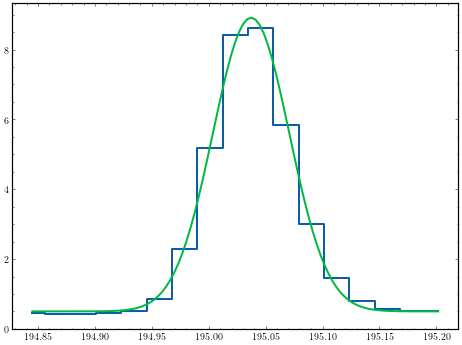

In [252]:
stray_195_4563 = ma.mean(data_195_mean_4563[340:,:],axis=0)*0.02

g_init = myGaussian1D(intensity = np.max(stray_195_4563) * np.sqrt(2*np.pi)*0.04, mean=wvl_195[np.argmax(stray_195_4563)],
                      fwhm = 0.06,bg = 0.,stray_int=0,stray_fwhm = 1,stray_wvl=0)
g_init.stray_int.fixed = True
g_init.stray_fwhm.fixed = True
fit_g = fitting.LevMarLSQFitter()
g_195_stray_4563 = fit_g(g_init, wvl_195, stray_195_4563)

fig,ax=plt.subplots(figsize=(8,6))
wvl_195_stray_plot = np.linspace(wvl_195[0],wvl_195[-1],101)
plt.step(wvl_195,stray_195_4563,where="mid",lw=2)
plt.plot(wvl_195_stray_plot,g_195_stray_4563(wvl_195_stray_plot),lw=2)
g_195_stray_4563


<myGaussian1D(intensity=0.72901359, mean=195.00714841, fwhm=0.07975864, bg=0.50552068, stray_int=0., stray_fwhm=1., stray_wvl=0.)>

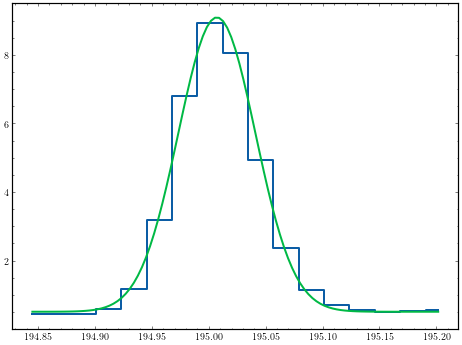

In [277]:
stray_195_repeat_4563 = ma.mean(data_repeat_195_mean_4563[340:,:],axis=0)*0.02

g_init = myGaussian1D(intensity = np.max(stray_195_repeat_4563) * np.sqrt(2*np.pi)*0.04, mean=wvl_195[np.argmax(stray_195_repeat_4563)],
                      fwhm = 0.06,bg = 0.,stray_int=0,stray_fwhm = 1,stray_wvl=0)
g_init.stray_int.fixed = True
g_init.stray_fwhm.fixed = True
fit_g = fitting.LevMarLSQFitter()
g_195_repeat_stray_4563 = fit_g(g_init, wvl_195, stray_195_repeat_4563)

fig,ax=plt.subplots(figsize=(8,6))
wvl_195_stray_plot = np.linspace(wvl_195[0],wvl_195[-1],101)
plt.step(wvl_195,stray_195_repeat_4563,where="mid",lw=2)
plt.plot(wvl_195_stray_plot,g_195_repeat_stray_4563(wvl_195_stray_plot),lw=2)
g_195_repeat_stray_4563


In [275]:
data_195_4563.shape

(18, 512, 17)

In [258]:
test_data_195_mean_bin8 = avg_new(test_data_195_mean[:320,:],N=8)
test_err_195_mean_bin8 = avg_err(test_err_195_mean[:320,:],N=8)

data_195_mean_bin8_4563 = avg_new(data_195_mean_4563[:320,:],N=8)
err_195_mean_bin8_4563 = avg_err(err_195_mean_4563[:320,:],N=8)

data_repeat_195_mean_bin8_4563 = avg_new(data_repeat_195_mean_4563[:320,:],N=8)
err_repeat_195_mean_bin8_4563 = avg_err(err_repeat_195_mean_4563[:320,:],N=8)

r_coord_8 = 1 + np.arange(4,321,step=8)/966.63

<ErrorbarContainer object of 3 artists>

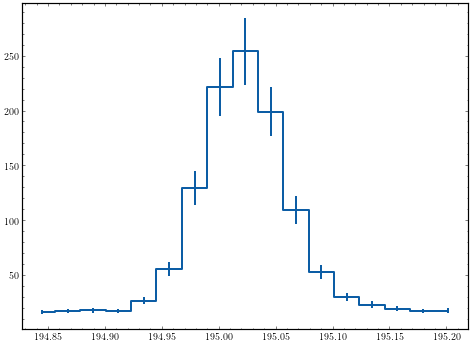

In [18]:
fig,ax=plt.subplots(figsize=(8,6))
plt.errorbar(x=wvl_195,y=test_data_195_mean_bin8[-10,:],yerr=test_err_195_mean_bin8[-10,:],lw=2,ds="steps-mid")

In [67]:
slit_width_512 = scipy.io.readsav("../save/slit_width.sav")["slit_width"] 
slit_width_bin8 = np.mean(slit_width_512[:320].reshape(-1,8),axis=1)

In [149]:
FeXII_195_bin8 = FeXII_fit(test_data_195_mean_bin8,wvl_195,[1,195.05,0.05,10],err = test_err_195_mean_bin8,stray_int = g_195_stray.intensity.value, 
                      stray_fwhm= g_195_stray.fwhm.value,stray_wvl = g_195_stray.mean.value)
FeXII_195_bin8.run_lse(ignore_err=True)

FeXII_195_bin8_nostray = FeXII_fit(test_data_195_mean_bin8,wvl_195,[1,195.05,0.05,10],err = None,stray_int = 0, 
                      stray_fwhm= g_195_stray.fwhm.value,stray_wvl = g_195_stray.mean.value)
FeXII_195_bin8_nostray.run_lse()

fwhm_195_bin8 = FeXII_195_bin8.get_para()[:,2]
fwhm_195_bin8_err = FeXII_195_bin8.get_error()[:,2]
fwhm_195_bin8_cor = np.sqrt(fwhm_195_bin8**2-slit_width_bin8**2)

fwhm_195_bin8_nostray = FeXII_195_bin8_nostray.get_para()[:,2]
fwhm_195_bin8_nostray_err = FeXII_195_bin8_nostray.get_error()[:,2]
fwhm_195_bin8_nostray_cor = np.sqrt(fwhm_195_bin8_nostray**2-slit_width_bin8**2)
#fwhm_195_cor_bin8 = np.flip(np.sqrt(np.power(fwhm_195_bin8,2) - np.power(slit_width_8,2)))
#fwhm_195_err_bin8 = np.flip(fwhm_195_bin8)/fwhm_195_cor_bin8*np.flip(FeXII_195_bin8.get_error()[:,2])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()


In [291]:
FeXII_195_bin8_4563 = FeXII_fit(data_195_mean_bin8_4563,wvl_195,[1,195.05,0.08,10],err = err_195_mean_bin8_4563,stray_int = g_195_stray_4563.intensity.value, 
                      stray_fwhm= g_195_stray_4563.fwhm.value,stray_wvl = g_195_stray_4563.mean.value)
FeXII_195_bin8_4563.run_lse(ignore_err=True)

FeXII_195_bin8_nostray_4563 = FeXII_fit(data_195_mean_bin8_4563,wvl_195,[1,195.05,0.05,10],err = None,stray_int = 0, 
                      stray_fwhm= g_195_stray_4563.fwhm.value,stray_wvl = g_195_stray_4563.mean.value)
FeXII_195_bin8_nostray_4563.run_lse()

fwhm_195_bin8_4563 = FeXII_195_bin8_4563.get_para()[:,2]
fwhm_195_bin8_err_4563 = FeXII_195_bin8_4563.get_error()[:,2]
fwhm_195_bin8_cor_4563 = np.sqrt(fwhm_195_bin8_4563**2-slit_width_bin8**2)
lambda0_195_bin8_4563 = FeXII_195_bin8_4563.get_para()[:,1]

fwhm_195_bin8_nostray_4563 = FeXII_195_bin8_nostray_4563.get_para()[:,2]
fwhm_195_bin8_nostray_err_4563 = FeXII_195_bin8_nostray_4563.get_error()[:,2]
fwhm_195_bin8_nostray_cor_4563 = np.sqrt(fwhm_195_bin8_nostray_4563**2-slit_width_bin8**2)
lambda0_195_bin8_nostray_4563 = FeXII_195_bin8_nostray_4563.get_para()[:,1]

array([195.05338612, 195.05281606, 195.05109299, 195.05233098,
       195.05221751, 195.0502521 , 195.05032427, 195.05080052,
       195.05016866, 195.04979252, 195.04982765, 195.05086189,
       195.05046637, 195.0470784 , 195.04685376, 195.04740515,
       195.047566  , 195.04862372, 195.04835613, 195.04787605,
       195.04671759, 195.04625311, 195.04616186, 195.04590394,
       195.04522611, 195.04493946, 195.04594869, 195.04608494,
       195.04522938, 195.04405946, 195.04493115, 195.04420847,
       195.04408491, 195.04358297, 195.0440992 , 195.04381632,
       195.04504555, 195.04462205, 195.04085083, 195.03925438])

In [278]:
FeXII_repeat_195_bin8_4563 = FeXII_fit(data_repeat_195_mean_bin8_4563,wvl_195,[1,195.05,0.08,10],err = err_repeat_195_mean_bin8_4563,
                                       stray_int = g_195_repeat_stray_4563.intensity.value, 
                                       stray_fwhm= g_195_repeat_stray_4563.fwhm.value,stray_wvl = g_195_repeat_stray_4563.mean.value)
FeXII_repeat_195_bin8_4563.run_lse(ignore_err=True)

FeXII_repeat_195_bin8_nostray_4563 = FeXII_fit(data_repeat_195_mean_bin8_4563,wvl_195,[1,195.05,0.05,10],err = None,stray_int = 0, 
                      stray_fwhm= g_195_stray.fwhm.value,stray_wvl = g_195_stray.mean.value)
FeXII_repeat_195_bin8_nostray_4563.run_lse()

fwhm_195_repeat_bin8_4563 = FeXII_repeat_195_bin8_4563.get_para()[:,2]
fwhm_195_repeat_bin8_err_4563 = FeXII_repeat_195_bin8_4563.get_error()[:,2]
fwhm_195_repeat_bin8_cor_4563 = np.sqrt(fwhm_195_repeat_bin8_4563**2-slit_width_bin8**2)

fwhm_195_repeat_bin8_nostray_4563 = FeXII_repeat_195_bin8_nostray_4563.get_para()[:,2]
fwhm_195_repeat_bin8_nostray_err_4563 = FeXII_repeat_195_bin8_nostray_4563.get_error()[:,2]
fwhm_195_repeat_bin8_nostray_cor_4563 = np.sqrt(fwhm_195_repeat_bin8_nostray_4563**2-slit_width_bin8**2)

In [298]:
lambda0_195_repeat_bin8_4563 = FeXII_repeat_195_bin8_4563.get_para()[:,1]
lambda0_195_repeat_bin8_nostray_4563 = FeXII_repeat_195_bin8_nostray_4563.get_para()[:,1]

In [172]:
data_195_mean_bin8_4563.shape

(40, 17)

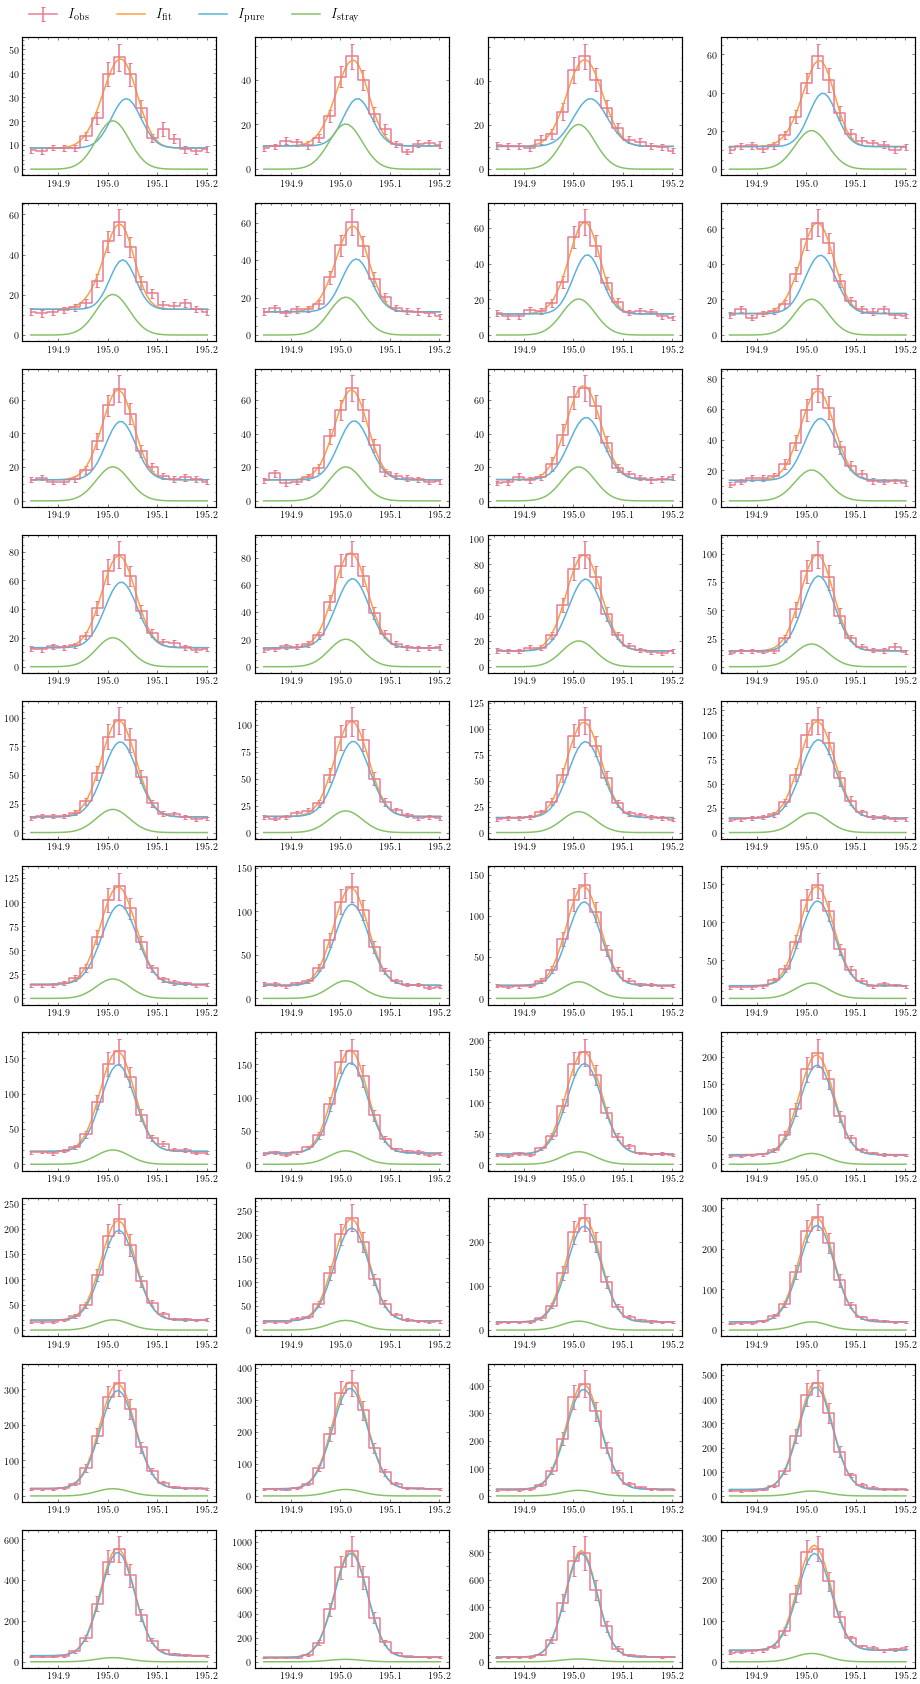

In [151]:
FeXII_195_bin8.plot()

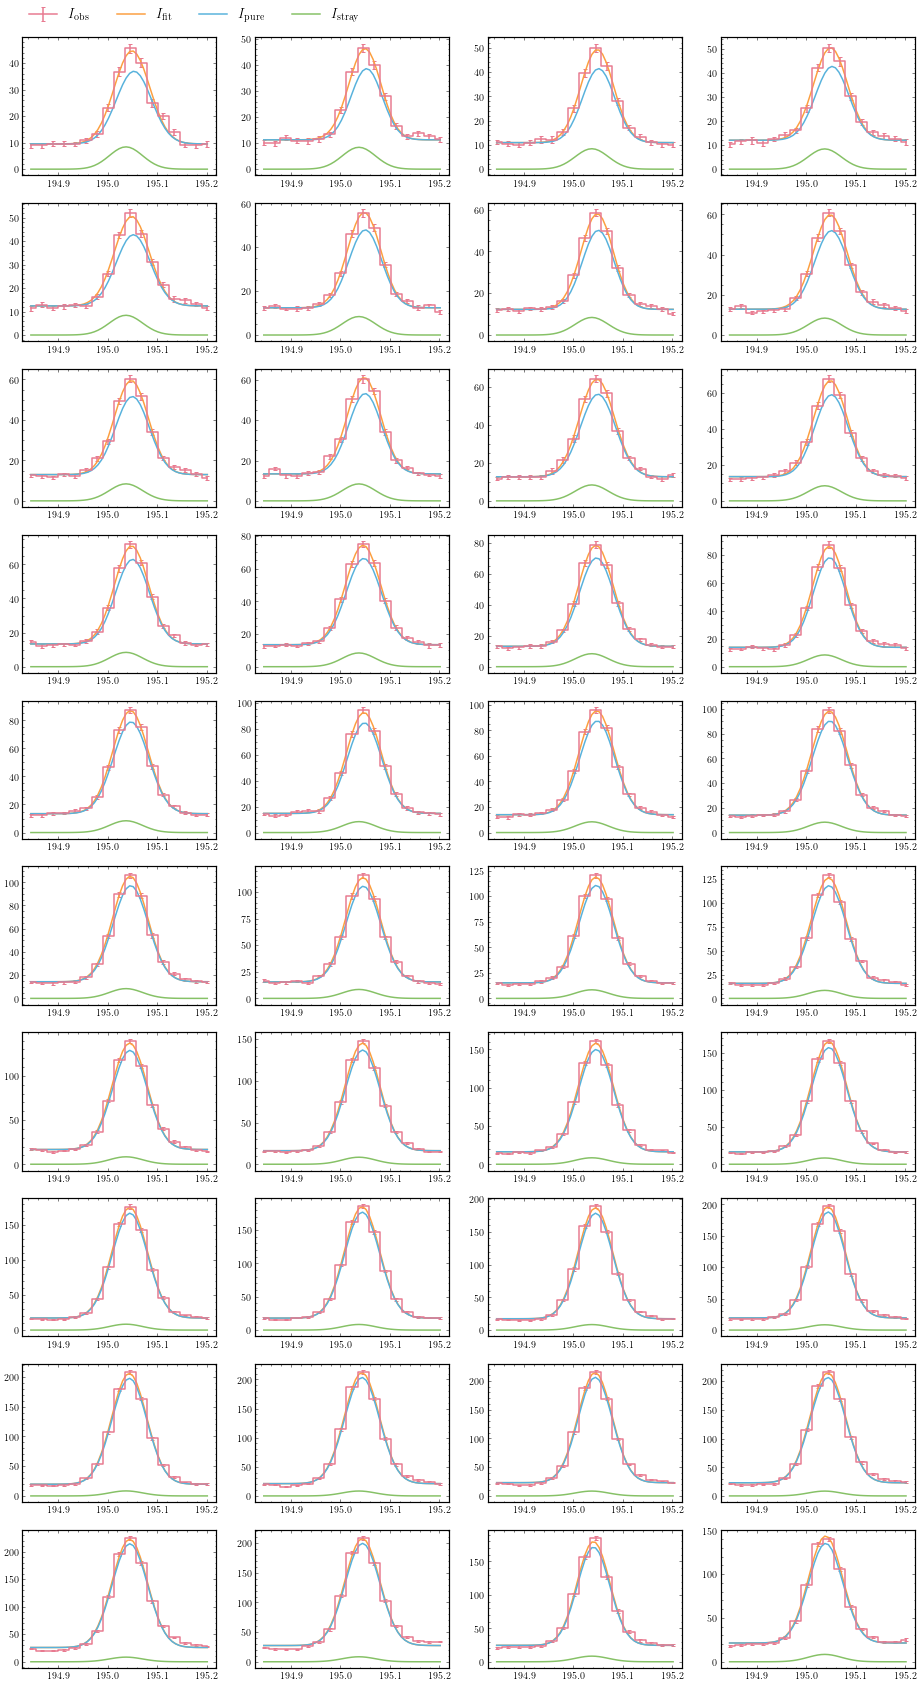

In [269]:
FeXII_195_bin8_4563.plot()

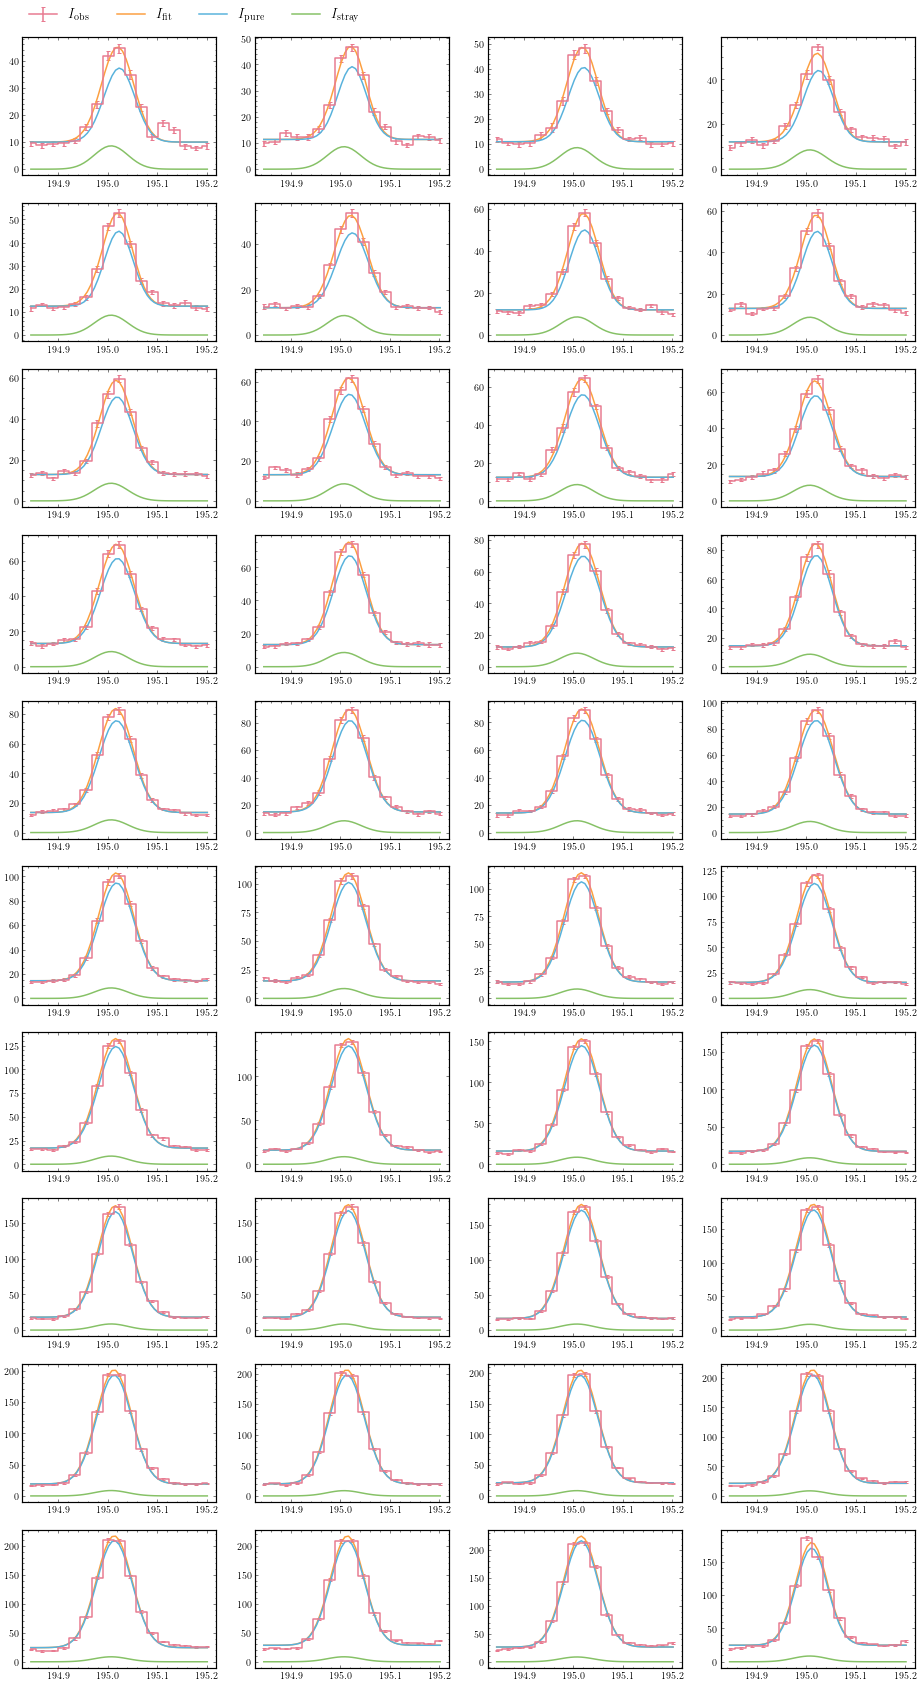

In [279]:
FeXII_repeat_195_bin8_4563.plot()

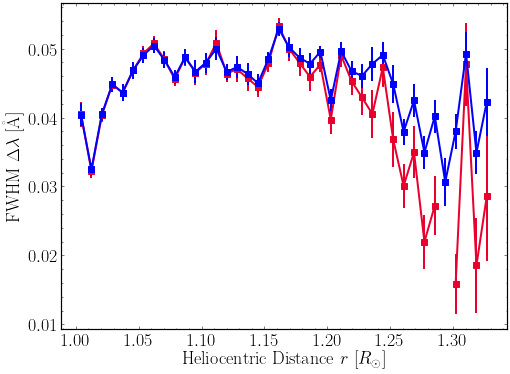

In [94]:
fig,ax=plt.subplots(figsize=(8,6))
ax.errorbar(x = r_coord_8,y=np.flip(fwhm_195_bin8_cor),yerr=np.flip(fwhm_195_bin8_err),lw=2,marker="s",color="#E9002D")
ax.errorbar(x = r_coord_8,y=np.flip(fwhm_195_bin8_nostray_cor),yerr=np.flip(fwhm_195_bin8_nostray_err),lw=2,marker="s",color="blue")
ax.set_xlabel(r'Heliocentric Distance $r$ [$R_\odot$]',fontsize=18)
ax.set_ylabel(r'FWHM $\Delta \lambda$ [\mbox{\AA}]',fontsize=18)
ax.tick_params(labelsize=18)

ax_t = ax.twinx()
ax_v = ax.twinx()
ax_v.spines['right'].set_position(('outward', 60))    

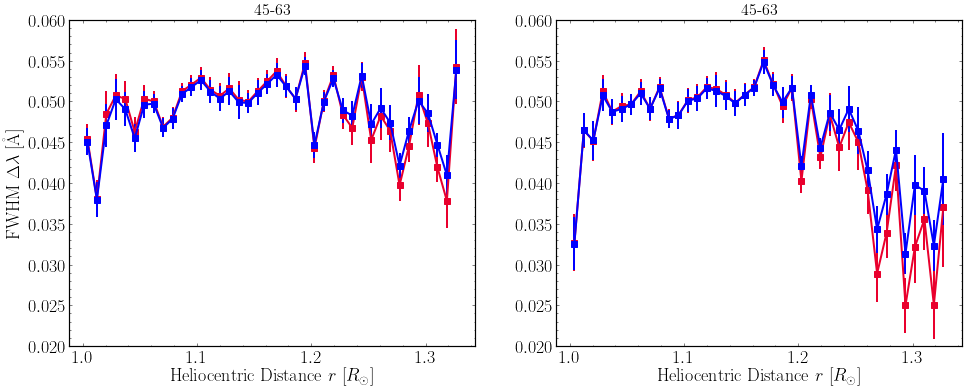

In [283]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,6))
ax1.errorbar(x = r_coord_8,y=np.flip(fwhm_195_bin8_cor_4563),yerr=np.flip(fwhm_195_bin8_err_4563),lw=2,marker="s",color="#E9002D")
ax1.errorbar(x = r_coord_8,y=np.flip(fwhm_195_bin8_nostray_cor_4563),yerr=np.flip(fwhm_195_bin8_nostray_err_4563),lw=2,marker="s",color="blue")
ax1.set_xlabel(r'Heliocentric Distance $r$ [$R_\odot$]',fontsize=18)
ax1.set_ylabel(r'FWHM $\Delta \lambda$ [\mbox{\AA}]',fontsize=18)
ax1.tick_params(labelsize=18)
ax1.set_title("45-63",fontsize=16)

ax2.errorbar(x = r_coord_8,y=np.flip(fwhm_195_repeat_bin8_cor_4563),yerr=np.flip(fwhm_195_repeat_bin8_err_4563),lw=2,marker="s",color="#E9002D")
ax2.errorbar(x = r_coord_8,y=np.flip(fwhm_195_repeat_bin8_nostray_cor_4563),yerr=np.flip(fwhm_195_repeat_bin8_nostray_err_4563),lw=2,marker="s",color="blue")
ax2.set_xlabel(r'Heliocentric Distance $r$ [$R_\odot$]',fontsize=18)
#ax1.set_ylabel(r'FWHM $\Delta \lambda$ [\mbox{\AA}]',fontsize=18)
ax2.tick_params(labelsize=18)
ax2.set_title("45-63",fontsize=16)
for ax_ in (ax1,ax2):
    ax_.set_ylim(0.02,0.06)

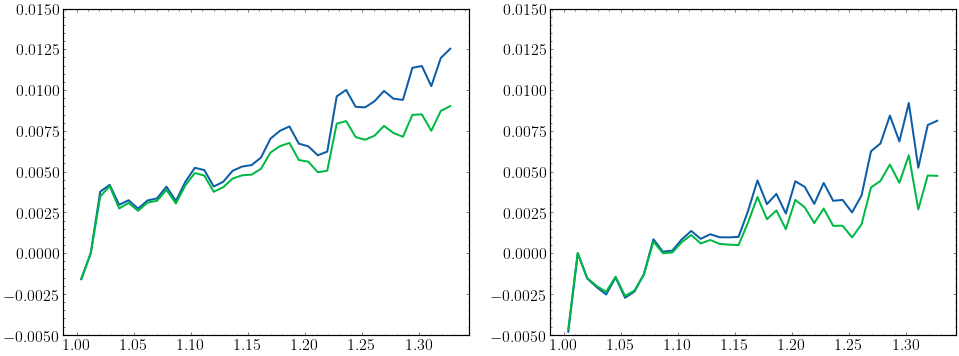

In [303]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,6))
ax1.plot(r_coord_8,np.flip(lambda0_195_bin8_4563)-lambda0_195_bin8_4563[-2],lw=2)
ax1.plot(r_coord_8,np.flip(lambda0_195_bin8_nostray_4563)-lambda0_195_bin8_nostray_4563[-2],lw=2)

ax2.plot(r_coord_8,np.flip(lambda0_195_repeat_bin8_4563)-lambda0_195_repeat_bin8_4563[-2],lw=2)
ax2.plot(r_coord_8,np.flip(lambda0_195_repeat_bin8_nostray_4563)-lambda0_195_repeat_bin8_nostray_4563[-2],lw=2)

for ax_ in (ax1,ax2):
    ax_.set_ylim(-0.005,0.015)
    ax_.tick_params(labelsize=16)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


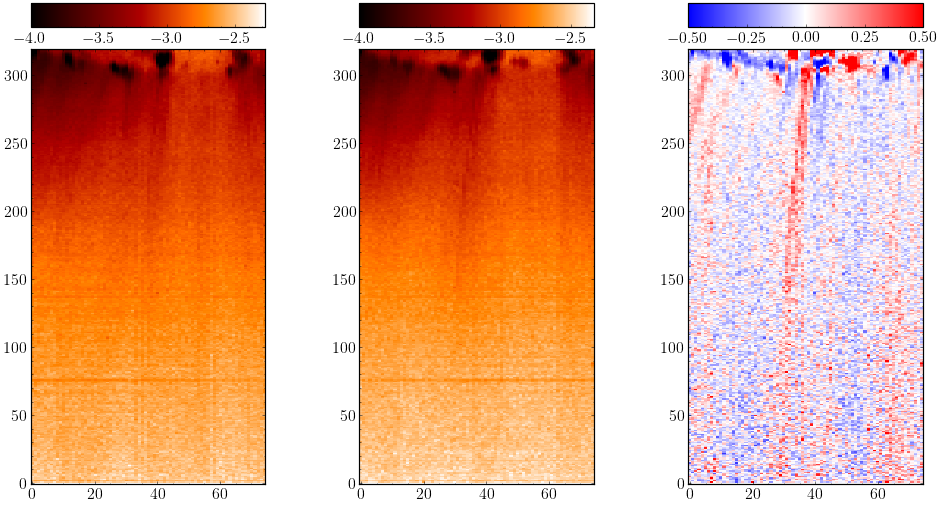

In [230]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,8))
im = ax1.imshow(-np.log10(np.sum(data_set_cor["new_data_offset"][:,:320,window_start_index[8]+16:window_start_index[8]+33],axis=2).T),
           origin="lower",aspect="auto",cmap=xrtmap,vmin=-4)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

clb_ax = inset_axes(ax1,width="100%",height= "5%",loc='lower left',
                bbox_to_anchor=(0, 1.05, 1, 1.1),
                 bbox_transform=ax1.transAxes,
                 borderpad=0)
clb = plt.colorbar(im,pad = 0.05,orientation='horizontal',ax=ax1,cax=clb_ax)
clb_ax.tick_params(labelsize=16)
clb_ax.yaxis.get_offset_text().set_fontsize(16)
clb_ax.set_ylabel('',fontsize=18)

im = ax2.imshow(-np.log10(np.sum(data_set_cor_repeat["new_data_offset"][:,:320,window_start_index[8]+16:window_start_index[8]+33],axis=2).T),
           origin="lower",aspect="auto",cmap=xrtmap,vmin=-4)
clb_ax = inset_axes(ax2,width="100%",height= "5%",loc='lower left',
                bbox_to_anchor=(0, 1.05, 1, 1.1),
                 bbox_transform=ax2.transAxes,
                 borderpad=0)
clb = plt.colorbar(im,pad = 0.05,orientation='horizontal',ax=ax2,cax=clb_ax)
clb_ax.tick_params(labelsize=16)
clb_ax.yaxis.get_offset_text().set_fontsize(16)
clb_ax.set_ylabel('',fontsize=18)

im = ax3.imshow(((np.sum(data_set_cor_repeat["new_data_offset"][:,:320,window_start_index[8]+16:window_start_index[8]+33],axis=2)-
                np.sum(data_set_cor["new_data_offset"][:,:320,window_start_index[8]+16:window_start_index[8]+33],axis=2))/ \
                 np.sum(data_set_cor["new_data_offset"][:,:320,window_start_index[8]+16:window_start_index[8]+33],axis=2)).T,
           origin="lower",aspect="auto",cmap="bwr",vmin=-0.5,vmax=0.5)
clb_ax = inset_axes(ax3,width="100%",height= "5%",loc='lower left',
                bbox_to_anchor=(0, 1.05, 1, 1.1),
                 bbox_transform=ax3.transAxes,
                 borderpad=0)
clb = plt.colorbar(im,pad = 0.05,orientation='horizontal',ax=ax3,cax=clb_ax)
clb_ax.tick_params(labelsize=16)
clb_ax.yaxis.get_offset_text().set_fontsize(16)
clb_ax.set_ylabel('',fontsize=18)

for ax_ in (ax1,ax2,ax3):
    ax_.tick_params(labelsize=16)
plt.subplots_adjust(wspace=0.4)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


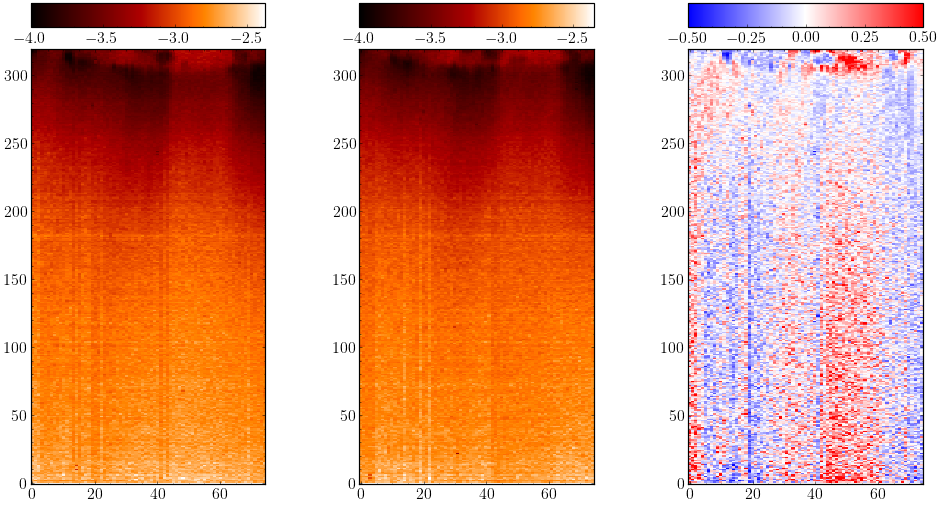

In [231]:
#Fe X 190
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,8))
im = ax1.imshow(-np.log10(np.sum(data_set_cor["new_data_offset"][:,:320,window_start_index[6]:window_end_index[6]],axis=2).T),
           origin="lower",aspect="auto",cmap=xrtmap,vmin=-4)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

clb_ax = inset_axes(ax1,width="100%",height= "5%",loc='lower left',
                bbox_to_anchor=(0, 1.05, 1, 1.1),
                 bbox_transform=ax1.transAxes,
                 borderpad=0)
clb = plt.colorbar(im,pad = 0.05,orientation='horizontal',ax=ax1,cax=clb_ax)
clb_ax.tick_params(labelsize=16)
clb_ax.yaxis.get_offset_text().set_fontsize(16)
clb_ax.set_ylabel('',fontsize=18)

im = ax2.imshow(-np.log10(np.sum(data_set_cor_repeat["new_data_offset"][:,:320,window_start_index[6]:window_end_index[6]],axis=2).T),
           origin="lower",aspect="auto",cmap=xrtmap,vmin=-4)
clb_ax = inset_axes(ax2,width="100%",height= "5%",loc='lower left',
                bbox_to_anchor=(0, 1.05, 1, 1.1),
                 bbox_transform=ax2.transAxes,
                 borderpad=0)
clb = plt.colorbar(im,pad = 0.05,orientation='horizontal',ax=ax2,cax=clb_ax)
clb_ax.tick_params(labelsize=16)
clb_ax.yaxis.get_offset_text().set_fontsize(16)
clb_ax.set_ylabel('',fontsize=18)

im = ax3.imshow(((np.sum(data_set_cor_repeat["new_data_offset"][:,:320,window_start_index[6]:window_end_index[6]],axis=2)-
                np.sum(data_set_cor["new_data_offset"][:,:320,window_start_index[6]:window_end_index[6]],axis=2))/ \
                 np.sum(data_set_cor["new_data_offset"][:,:320,window_start_index[6]:window_end_index[6]],axis=2)).T,
           origin="lower",aspect="auto",cmap="bwr",vmin=-0.5,vmax=0.5)
clb_ax = inset_axes(ax3,width="100%",height= "5%",loc='lower left',
                bbox_to_anchor=(0, 1.05, 1, 1.1),
                 bbox_transform=ax3.transAxes,
                 borderpad=0)
clb = plt.colorbar(im,pad = 0.05,orientation='horizontal',ax=ax3,cax=clb_ax)
clb_ax.tick_params(labelsize=16)
clb_ax.yaxis.get_offset_text().set_fontsize(16)
clb_ax.set_ylabel('',fontsize=18)

for ax_ in (ax1,ax2,ax3):
    ax_.tick_params(labelsize=16)
plt.subplots_adjust(wspace=0.4)

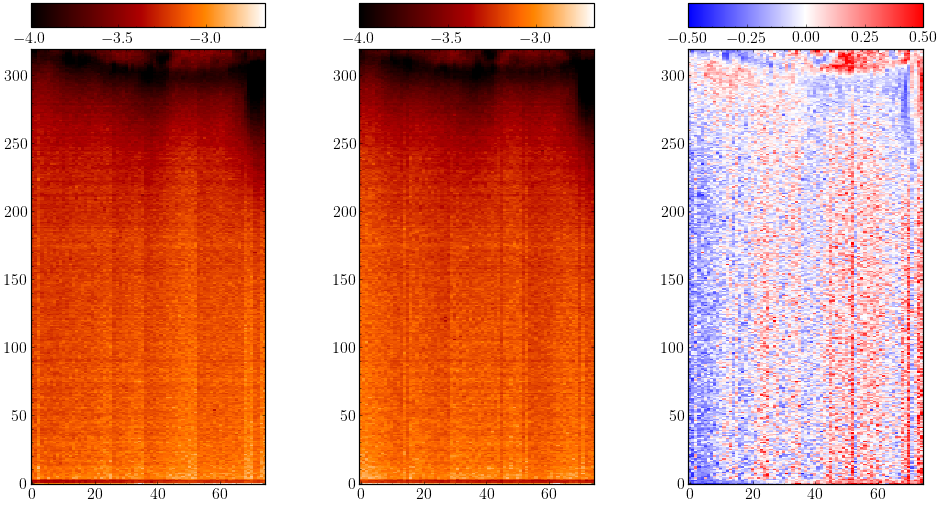

In [240]:
#Fe VIII 185
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,8))
im = ax1.imshow(-np.log10(np.sum(data_set_cor["new_data_offset"][:,:320,window_start_index[4]:window_end_index[4]],axis=2).T),
           origin="lower",aspect="auto",cmap=xrtmap,vmin=-4)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

clb_ax = inset_axes(ax1,width="100%",height= "5%",loc='lower left',
                bbox_to_anchor=(0, 1.05, 1, 1.1),
                 bbox_transform=ax1.transAxes,
                 borderpad=0)
clb = plt.colorbar(im,pad = 0.05,orientation='horizontal',ax=ax1,cax=clb_ax)
clb_ax.tick_params(labelsize=16)
clb_ax.yaxis.get_offset_text().set_fontsize(16)
clb_ax.set_ylabel('',fontsize=18)

im = ax2.imshow(-np.log10(np.sum(data_set_cor_repeat["new_data_offset"][:,:320,window_start_index[4]:window_end_index[4]],axis=2).T),
           origin="lower",aspect="auto",cmap=xrtmap,vmin=-4)
clb_ax = inset_axes(ax2,width="100%",height= "5%",loc='lower left',
                bbox_to_anchor=(0, 1.05, 1, 1.1),
                 bbox_transform=ax2.transAxes,
                 borderpad=0)
clb = plt.colorbar(im,pad = 0.05,orientation='horizontal',ax=ax2,cax=clb_ax)
clb_ax.tick_params(labelsize=16)
clb_ax.yaxis.get_offset_text().set_fontsize(16)
clb_ax.set_ylabel('',fontsize=18)

im = ax3.imshow(((np.sum(data_set_cor_repeat["new_data_offset"][:,:320,window_start_index[4]:window_end_index[4]],axis=2)-
                np.sum(data_set_cor["new_data_offset"][:,:320,window_start_index[4]:window_end_index[4]],axis=2))/ \
                 np.sum(data_set_cor["new_data_offset"][:,:320,window_start_index[4]:window_end_index[4]],axis=2)).T,
           origin="lower",aspect="auto",cmap="bwr",vmin=-0.5,vmax=0.5)
clb_ax = inset_axes(ax3,width="100%",height= "5%",loc='lower left',
                bbox_to_anchor=(0, 1.05, 1, 1.1),
                 bbox_transform=ax3.transAxes,
                 borderpad=0)
clb = plt.colorbar(im,pad = 0.05,orientation='horizontal',ax=ax3,cax=clb_ax)
clb_ax.tick_params(labelsize=16)
clb_ax.yaxis.get_offset_text().set_fontsize(16)
clb_ax.set_ylabel('',fontsize=18)

for ax_ in (ax1,ax2,ax3):
    ax_.tick_params(labelsize=16)
plt.subplots_adjust(wspace=0.4)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


Text(0, 0.5, '')

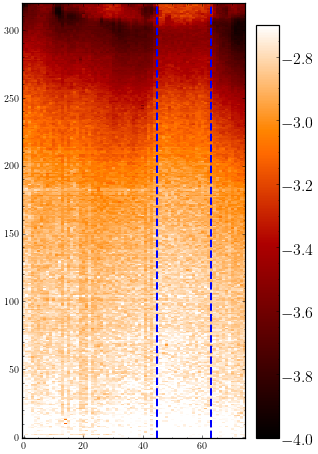

In [122]:
fig,ax = plt.subplots(figsize=(4,8))
im = plt.imshow(-np.log10(np.sum(data_set_cor["new_data_offset"][:,:320,window_start_index[6]:window_end_index[6]],axis=2).T),
           origin="lower",aspect="auto",cmap=xrtmap,vmin=-4,vmax=-2.7)

ax.axvline(45,lw=2,color="blue",ls="--")
ax.axvline(63,lw=2,color="blue",ls="--")
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
clb_ax = inset_axes(ax,width="10%",height= "95%",loc='lower left',
                bbox_to_anchor=(1.05, 0., 1, 1),
                 bbox_transform=ax.transAxes,
                 borderpad=0)
clb = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=ax,cax=clb_ax)
clb_ax.tick_params(labelsize=16)
clb_ax.yaxis.get_offset_text().set_fontsize(16)
clb_ax.set_ylabel('',fontsize=18)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


Text(0, 0.5, '')

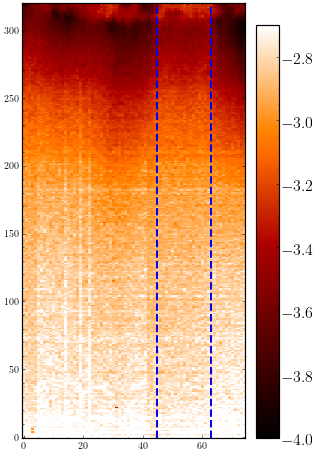

In [186]:
fig,ax = plt.subplots(figsize=(4,8))
im = plt.imshow(-np.log10(np.sum(data_set_cor_repeat["new_data_offset"][:,:320,window_start_index[6]:window_end_index[6]],axis=2).T),
           origin="lower",aspect="auto",cmap=xrtmap,vmin=-4,vmax=-2.7)

ax.axvline(45,lw=2,color="blue",ls="--")
ax.axvline(63,lw=2,color="blue",ls="--")
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
clb_ax = inset_axes(ax,width="10%",height= "95%",loc='lower left',
                bbox_to_anchor=(1.05, 0., 1, 1),
                 bbox_transform=ax.transAxes,
                 borderpad=0)
clb = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=ax,cax=clb_ax)
clb_ax.tick_params(labelsize=16)
clb_ax.yaxis.get_offset_text().set_fontsize(16)
clb_ax.set_ylabel('',fontsize=18)

In [96]:
data_set_cor["new_data_offset"].shape

(75, 534, 976)

In [40]:
print(test_data_195_mean_bin8[-1,:])
print(wvl_195)
print(test_err_195_mean_bin8[-1,:])

[22.28432076847742 23.091823491596042 25.43908927175734 27.40261909166972
 36.82503271254283 75.17560043940468 165.57842548915318 266.23430213928225
 274.22475452423095 195.27634865897042 109.66219493321009
 56.581709671020505 37.30128615243093 32.73902106285095 27.675603306735002
 30.198910654158823 34.53748032251993]
[194.84504641 194.86733074 194.88961503 194.9118993  194.93418354
 194.95646776 194.97875196 195.00103613 195.02332027 195.04560439
 195.06788848 195.09017254 195.11245659 195.1347406  195.15702459
 195.17930856 195.2015925 ]
[2.7507617434811187 2.750694963817564 3.4559816521921523
 3.7043666950098895 4.549854728837164 9.091100704045981 19.89161469582213
 29.888840476491104 30.772324473278065 23.424088667773095
 13.185720299821712 6.421213895256213 4.571135104965397 4.321648067752592
 3.7400063797684795 3.7420120789470324 4.635179955273177]


In [62]:
wvl[window_start_index[8]+22:window_start_index[8]+35]

array([194.97875196, 195.00103613, 195.02332027, 195.04560439,
       195.06788848, 195.09017254, 195.11245659, 195.1347406 ,
       195.15702459, 195.17930856, 195.2015925 , 195.22387641,
       195.2461603 ])